In [78]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
os.chdir(r"D:\Training\Imarticus\PGA\PGA27\ML\Tree")

In [80]:
os.listdir()

['bank.xlsx',
 'data_dictionary_trip_records_yellow.pdf',
 'Treebased_algo-Copy1.ipynb',
 'yellow_tripdata_2022-09.parquet']

In [81]:
df0=pd.read_parquet("yellow_tripdata_2022-09.parquet")

In [82]:
df=df0.sample(50000, random_state=0)

In [83]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1895567,1,2022-09-20 10:08:19,2022-09-20 10:32:24,1.00000,3.30000,99.00000,N,25,62,1,17.20000,0.00000,0.50000,0.00000,0.00000,0.30000,18.00000,0.00000,0.00000
2729396,2,2022-09-28 10:26:30,2022-09-28 11:06:53,1.00000,11.78000,1.00000,N,132,17,1,38.50000,0.00000,0.50000,7.86000,0.00000,0.30000,48.41000,0.00000,1.25000
2800893,2,2022-09-28 20:08:54,2022-09-28 20:20:53,1.00000,1.96000,1.00000,N,161,68,1,9.50000,1.00000,0.50000,2.76000,0.00000,0.30000,16.56000,2.50000,0.00000
903727,2,2022-09-09 21:21:02,2022-09-09 21:29:52,1.00000,1.89000,1.00000,N,263,162,1,8.50000,0.50000,0.50000,1.00000,0.00000,0.30000,13.30000,2.50000,0.00000
730612,2,2022-09-08 14:19:05,2022-09-08 14:35:21,1.00000,2.17000,1.00000,N,236,229,1,11.50000,0.00000,0.50000,3.70000,0.00000,0.30000,18.50000,2.50000,0.00000


In [84]:
df.shape

(50000, 19)

In [85]:
df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          1789
trip_distance               0
RatecodeID               1789
store_and_fwd_flag       1789
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     1789
airport_fee              1789
dtype: int64

In [86]:
df.dropna(inplace=True)

In [87]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64

## EDA 

### 1. Univariate 

In [88]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

In [89]:
def univariate_cat(data, x):
    missing=data[x].isnull().sum()
    unique_cnt=data[x].nunique()
    unique_cat=list(data[x].unique())
    f1=pd.DataFrame(data[x].value_counts())
    f1.rename(columns={x:"Count"}, inplace=True)
    f2=pd.DataFrame(data[x].value_counts(normalize=True))
    f2.rename(columns={x:"percentage"}, inplace=True)
    f2["percentage"]=(f2["percentage"]*100).round(2).astype(str)+"%"
    ff=pd.concat([f1, f2], axis=1)
    print(f"Total missing values : {missing}\n")
    print(f"Total count of unique categories: {unique_cnt}\n")
    print(f"Unique categories :\n{unique_cat}")
    print(f"Value count and %\n", ff)
    sns.countplot(data=data, x=x)
    plt.show() 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['N', 'Y']
Value count and %
    Count percentage
N  47812     99.17%
Y    399      0.83%


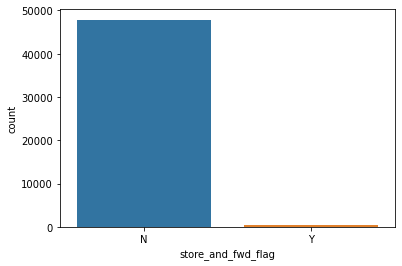

In [90]:
univariate_cat(data=df, x="store_and_fwd_flag")

Total missing values : 0

Total count of unique categories: 2

Unique categories :
[1, 2]
Value count and %
    Count percentage
2  34414     71.38%
1  13797     28.62%


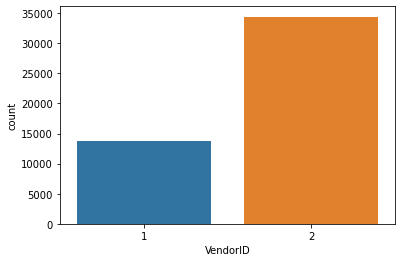

In [91]:
univariate_cat(data=df, x="VendorID")

In [92]:
df["VendorID"]=df["VendorID"].map({1:"CMT", 2:"Verifone"}) 

Total missing values : 0

Total count of unique categories: 2

Unique categories :
['CMT', 'Verifone']
Value count and %
           Count percentage
Verifone  34414     71.38%
CMT       13797     28.62%


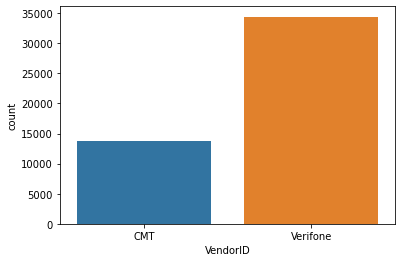

In [93]:
univariate_cat(data=df, x="VendorID")

Total missing values : 0

Total count of unique categories: 8

Unique categories :
[1.0, 2.0, 3.0, 0.0, 5.0, 6.0, 4.0, 7.0]
Value count and %
          Count percentage
1.00000  35801     74.26%
2.00000   7493     15.54%
3.00000   1883      3.91%
0.00000    909      1.89%
4.00000    800      1.66%
5.00000    793      1.64%
6.00000    530       1.1%
7.00000      2       0.0%


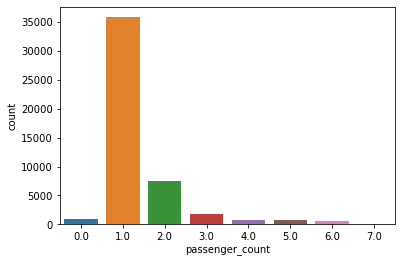

In [94]:
univariate_cat(data=df, x="passenger_count")

In [95]:
# df[df["passenger_count"]==0]

In [96]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
#     sns.histplot(data[x])
#     plt.show()
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

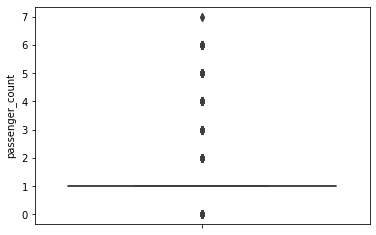

{'missing': 0,
 'min': 0.0,
 'max': 7.0,
 'mean': 1.39,
 'var': 0.87,
 'std': 0.93,
 'range': 7.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.79,
 'kurtosis': 8.85}

In [97]:
univariate_num(data=df, x="passenger_count")

In [98]:
def passenger(x):
    if x <=1:
        return "no_or_one_passenger"
    elif x ==2:
        return "two_passenger"
    elif x>=3:
        return "more_than_two_passenger"
    

In [99]:
df["passenger_cat"]=df["passenger_count"].apply(passenger)

In [100]:
df["passenger_cat"].value_counts()

no_or_one_passenger        36710
two_passenger               7493
more_than_two_passenger     4008
Name: passenger_cat, dtype: int64

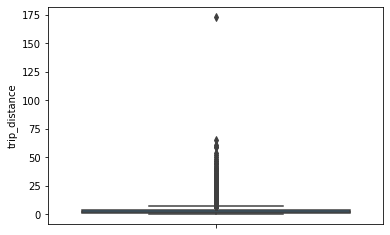

{'missing': 0,
 'min': 0.0,
 'max': 173.46,
 'mean': 3.65,
 'var': 22.12,
 'std': 4.7,
 'range': 173.46,
 'q1': 1.11,
 'q2': 1.9,
 'q3': 3.68,
 'skewness': 3.56,
 'kurtosis': 43.95}

In [101]:
univariate_num(data=df, x="trip_distance")

In [102]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df["trip_distance"].describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count   48211.00000
mean        3.64631
std         4.70365
min         0.00000
1%          0.00000
2%          0.10000
3%          0.34000
4%          0.43000
5%          0.50000
25%         1.11000
50%         1.90000
75%         3.68000
90%         9.60000
95%        16.33000
96%        17.38000
97%        18.07000
98%        18.88800
99%        20.44000
max       173.46000
Name: trip_distance, dtype: float64

Total missing values : 0

Total count of unique categories: 6

Unique categories :
[99.0, 1.0, 3.0, 2.0, 5.0, 4.0]
Value count and %
           Count percentage
1.00000   45149     93.65%
2.00000    2138      4.43%
5.00000     509      1.06%
99.00000    179      0.37%
3.00000     162      0.34%
4.00000      74      0.15%


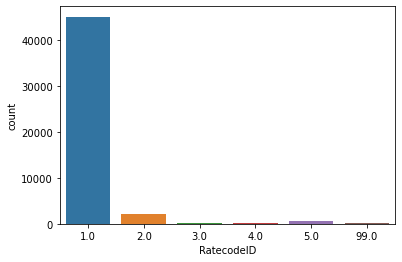

In [103]:
univariate_cat(data=df, x="RatecodeID")

In [104]:
np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

df["RatecodeID"]=df["RatecodeID"].map({1:"Standard_rate", 2:"JFK", 3:"Newark", 4:"Nassau", 
                                       5:"Negotiated_fare",6:"group_ride"})

Total missing values : 0

Total count of unique categories: 240

Unique categories :
[62, 17, 68, 162, 229, 264, 230, 7, 164, 79, 90, 170, 138, 234, 142, 236, 163, 186, 232, 43, 237, 144, 75, 143, 166, 239, 246, 263, 100, 140, 42, 141, 74, 48, 151, 114, 152, 233, 262, 158, 181, 161, 33, 228, 50, 249, 224, 255, 256, 261, 4, 107, 137, 209, 113, 95, 211, 231, 45, 238, 116, 146, 13, 129, 125, 49, 132, 61, 260, 205, 156, 41, 188, 87, 80, 64, 25, 145, 134, 216, 70, 12, 14, 265, 206, 112, 148, 226, 38, 37, 213, 92, 225, 88, 24, 85, 10, 82, 193, 1, 63, 243, 192, 168, 20, 66, 177, 179, 160, 195, 223, 127, 180, 174, 71, 97, 23, 244, 53, 21, 36, 248, 202, 210, 89, 9, 197, 194, 28, 165, 220, 200, 167, 218, 40, 98, 207, 219, 91, 185, 130, 198, 106, 65, 189, 55, 121, 247, 81, 203, 124, 169, 22, 72, 52, 257, 215, 54, 182, 119, 157, 254, 83, 102, 173, 93, 108, 242, 69, 175, 76, 135, 35, 56, 252, 26, 196, 217, 250, 131, 133, 259, 258, 34, 126, 29, 155, 30, 19, 18, 139, 128, 190, 86, 15, 39, 60, 16, 191

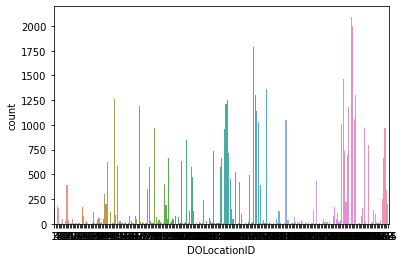

In [105]:
univariate_cat(data=df, x="DOLocationID")

In [106]:
df["is_pu_do_location_same"]=np.where(df["PULocationID"]==df["DOLocationID"],1,0)

In [107]:
df["is_pu_do_location_same"].value_counts()

0    45705
1     2506
Name: is_pu_do_location_same, dtype: int64

In [108]:
df.drop(columns=["PULocationID", "DOLocationID"], inplace=True)

In [109]:
# df.columns.to_list()

Total missing values : 0

Total count of unique categories: 4

Unique categories :
[1, 2, 3, 4]
Value count and %
    Count percentage
1  37951     78.72%
2   9609     19.93%
4    381      0.79%
3    270      0.56%


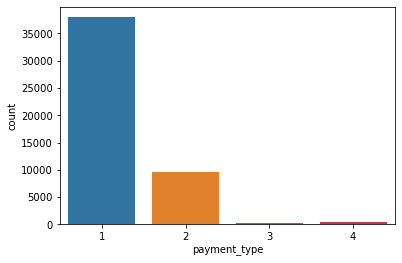

In [110]:
univariate_cat(df,"payment_type")

In [111]:
df["payment_type"]=df["payment_type"].map({1:"cc", 2:"cash", 3:"no_charge",4:"dispute", 5:"unknown",6:"voided_trip"})

In [112]:
# 1= Credit card
# 2= Cash
# 3= No charge
# 4= Dispute
# 5= Unknown
# 6= Voided trip
df.columns.to_list()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'passenger_cat',
 'is_pu_do_location_same']

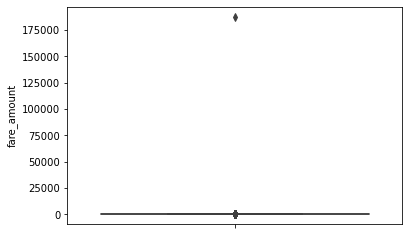

{'missing': 0,
 'min': -61.85,
 'max': 187444.96,
 'mean': 19.28,
 'var': 728893.17,
 'std': 853.75,
 'range': 187506.81,
 'q1': 7.0,
 'q2': 10.5,
 'q3': 17.0,
 'skewness': 219.47,
 'kurtosis': 48181.29}

In [113]:
univariate_num(df,"fare_amount")

In [114]:
df[df["fare_amount"]<2.5].shape 

(368, 19)

In [115]:
df["fare_amount"].describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count    48211.00000
mean        19.28485
std        853.75241
min        -61.85000
1%           2.50000
2%           3.50000
3%           4.00000
4%           4.50000
5%           4.50000
25%          7.00000
50%         10.50000
75%         17.00000
90%         33.50000
95%         52.00000
96%         52.00000
97%         52.00000
98%         52.00000
99%         63.00000
max     187444.96000
Name: fare_amount, dtype: float64

Total missing values : 0

Total count of unique categories: 21

Unique categories :
[0.0, 1.0, 0.5, 3.0, 2.5, 3.5, 3.75, 4.25, 4.5, 1.75, 8.25, -0.5, 1.25, 4.75, 2.25, -4.5, -1.0, 7.0, 5.75, -2.0, 4.0]
Value count and %
           Count percentage
0.00000   18688     38.76%
0.50000    9375     19.45%
1.00000    6595     13.68%
2.50000    6396     13.27%
3.00000    3098      6.43%
3.50000    2611      5.42%
3.75000     368      0.76%
4.50000     311      0.65%
1.25000     209      0.43%
1.75000     148      0.31%
-0.50000     85      0.18%
2.25000      64      0.13%
-1.00000     62      0.13%
8.25000      55      0.11%
4.25000      53      0.11%
4.75000      45      0.09%
7.00000      34      0.07%
-4.50000      9      0.02%
5.75000       3      0.01%
-2.00000      1       0.0%
4.00000       1       0.0%


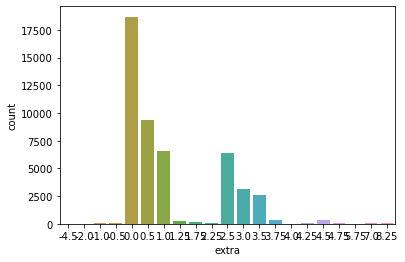

In [116]:
univariate_cat(df,"extra")

In [117]:
df[df["extra"]<0]["extra"].value_counts()

-0.50000    85
-1.00000    62
-4.50000     9
-2.00000     1
Name: extra, dtype: int64

In [118]:
df=df[df["extra"]>=0]

Total missing values : 0

Total count of unique categories: 5

Unique categories :
[0.5, 0.0, -0.5, 2.54, 0.55]
Value count and %
           Count percentage
0.50000   47234     98.29%
0.00000     641      1.33%
-0.50000    174      0.36%
2.54000       3      0.01%
0.55000       2       0.0%


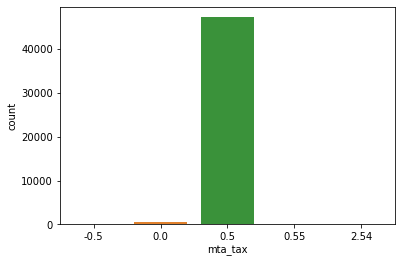

In [119]:
# 'VendorID','tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','RatecodeID','store_and_fwd_flag',
#  'payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge',
#  'airport_fee','passenger_cat','is_pu_do_location_same'
univariate_cat(df, "mta_tax")

In [120]:
df=df[df["mta_tax"]>=0]

In [121]:
# df.shape

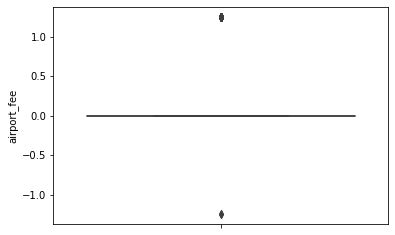

{'missing': 0,
 'min': -1.25,
 'max': 1.25,
 'mean': 0.11,
 'var': 0.13,
 'std': 0.36,
 'range': 2.5,
 'q1': 0.0,
 'q2': 0.0,
 'q3': 0.0,
 'skewness': 2.88,
 'kurtosis': 6.29}

In [122]:
univariate_num(df, "airport_fee")

In [123]:
df["airport_fee"].describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count   47880.00000
mean        0.11161
std         0.35663
min        -1.25000
1%          0.00000
2%          0.00000
3%          0.00000
4%          0.00000
5%          0.00000
25%         0.00000
50%         0.00000
75%         0.00000
90%         0.00000
95%         1.25000
96%         1.25000
97%         1.25000
98%         1.25000
99%         1.25000
max         1.25000
Name: airport_fee, dtype: float64

In [124]:
df.drop(columns=["improvement_surcharge"], inplace=True)

In [125]:
df["tpep_pickup_datetime"].dtypes

dtype('<M8[ns]')

In [126]:
df["tpep_pickup_datetime"].min()

Timestamp('2022-09-01 00:00:04')

In [127]:
df["tpep_pickup_datetime"].max()

Timestamp('2022-10-01 00:01:27')

In [128]:
df["year"]=df["tpep_pickup_datetime"].dt.year
df["month"]=df["tpep_pickup_datetime"].dt.month 
df["day"]=df["tpep_pickup_datetime"].dt.dayofweek
df["hour"]=df["tpep_pickup_datetime"].dt.hour
df["minute"]=df["tpep_pickup_datetime"].dt.minute
df["time"]=df["tpep_pickup_datetime"].dt.time

df["day_month"]=df["tpep_pickup_datetime"].dt.day


df["year_drop"]=df["tpep_dropoff_datetime"].dt.year
df["month_drop"]=df["tpep_dropoff_datetime"].dt.month 
df["day_drop"]=df["tpep_dropoff_datetime"].dt.dayofweek
df["hour_drop"]=df["tpep_dropoff_datetime"].dt.hour
df["minute_drop"]=df["tpep_dropoff_datetime"].dt.minute
df["time_drop"]=df["tpep_dropoff_datetime"].dt.time
df["day_month_drop"]=df["tpep_dropoff_datetime"].dt.day


In [129]:
df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]

1895567   0 days 00:24:05
2729396   0 days 00:40:23
2800893   0 days 00:11:59
903727    0 days 00:08:50
730612    0 days 00:16:16
                ...      
1344320   0 days 00:03:51
1296075   0 days 00:08:16
1232502   0 days 00:10:19
1025893   0 days 00:06:00
706858    0 days 00:18:59
Length: 47880, dtype: timedelta64[ns]

In [130]:
df["duration"]=((df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]))/pd.Timedelta(minutes=1)

In [131]:
df["duration"].describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count   47880.00000
mean       18.20551
std        42.34837
min         0.00000
1%          0.31667
2%          1.91667
3%          2.61667
4%          3.06667
5%          3.45000
10%         4.81667
25%         7.81667
50%        13.13333
75%        21.43333
90%        34.23333
95%        45.55000
96%        49.38333
97%        54.61667
98%        61.60700
99%        72.81667
max      1439.25000
Name: duration, dtype: float64

In [132]:
def dura(x):
    if x<15:
        return "short_trip"
    elif x>=15 and x<30:
        return "medium_time_trip"
    elif x>=30 and x<60:
        return "long_time_trip"
    else:
        return "very_long_time_trip"

In [133]:
df["length_duration"]=df["duration"].apply(dura) 

In [134]:
def time(x):
    if x>=5 and x<8:
        return "early_morning_trip"
    elif x>=8 and x <12:
        return "morning_office_trip"
    elif x>=12 and x<16:
        return "afternoo_trip"
    elif x>=16 and x<20:
        return "evening_office_trip"
    elif x>=20 and x<23:
        return "night_trip"
    elif x>=23 and x<5:
        return "Late_night_trip"
    else :
        return "Unknown"

In [135]:
df["hour_trip"]=df["hour"].apply(time)

In [136]:
def month(x):
    if x<=10:
        return "start_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    elif x >20 :
        return "end_of_month"
    

In [137]:
df["month_cat"]=df["day_month"].apply(month)

In [138]:
df["is_weekend"]=np.where(df["day"].isin([5,6]), 1,0)

In [139]:
df.shape

(47880, 37)

In [140]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'passenger_cat', 'is_pu_do_location_same', 'year', 'month', 'day',
       'hour', 'minute', 'time', 'day_month', 'year_drop', 'month_drop',
       'day_drop', 'hour_drop', 'minute_drop', 'time_drop', 'day_month_drop',
       'duration', 'length_duration', 'hour_trip', 'month_cat', 'is_weekend'],
      dtype='object')

In [141]:
df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime'], inplace=True)

In [142]:
df.dtypes

VendorID                   object
passenger_count           float64
trip_distance             float64
RatecodeID                 object
store_and_fwd_flag         object
payment_type               object
fare_amount               float64
extra                     float64
mta_tax                   float64
tip_amount                float64
tolls_amount              float64
total_amount              float64
congestion_surcharge      float64
airport_fee               float64
passenger_cat              object
is_pu_do_location_same      int32
year                        int64
month                       int64
day                         int64
hour                        int64
minute                      int64
time                       object
day_month                   int64
year_drop                   int64
month_drop                  int64
day_drop                    int64
hour_drop                   int64
minute_drop                 int64
time_drop                  object
day_month_drop

In [143]:
# df.info()

In [144]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,47880.00000,1.38569,0.93426,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,3.00000,4.00000,4.00000,5.00000,6.00000,7.00000
trip_distance,47880.00000,3.65642,4.70862,0.00000,0.00000,0.20000,0.38000,0.45000,0.50000,0.70000,1.12000,1.90000,3.69000,9.62000,16.36000,17.40000,18.08000,18.89420,20.45210,173.46000
fare_amount,47880.00000,19.50413,856.69362,-61.85000,3.50000,4.00000,4.00000,4.50000,4.50000,5.50000,7.50000,10.50000,17.50000,34.00000,52.00000,52.00000,52.00000,52.00000,63.00000,187444.96000
extra,47880.00000,1.05056,1.25998,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,2.50000,3.00000,3.50000,3.50000,3.50000,3.50000,4.25000,8.25000
mta_tax,47880.00000,0.49344,0.05971,0.00000,0.00000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,2.54000
tip_amount,47880.00000,2.84177,3.30777,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.19000,3.46000,6.02000,10.00000,10.84840,12.17000,12.62000,15.00000,100.00000
tolls_amount,47880.00000,0.60260,2.14657,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.55000,6.55000,6.55000,6.55000,6.55000,99.99000
total_amount,47880.00000,26.53275,856.74585,-63.40000,6.80000,7.80000,8.30000,8.80000,8.97000,10.14000,12.36000,16.55000,23.80000,47.10000,65.52150,69.12000,74.20000,75.72000,81.12000,187448.26000
congestion_surcharge,47880.00000,2.29809,0.68157,-2.50000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000
airport_fee,47880.00000,0.11161,0.35663,-1.25000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.25000,1.25000,1.25000,1.25000,1.25000,1.25000


In [145]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [146]:
# df.apply(outliers)

In [147]:
num=df.dtypes[df.dtypes!="object"].index
num
obj=df.dtypes[df.dtypes=="object"].index
obj

Index(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'passenger_cat', 'time', 'time_drop', 'length_duration', 'hour_trip',
       'month_cat'],
      dtype='object')

In [148]:
num_data=df[num]
obj_data=df[obj]

In [149]:
num_data0=num_data.apply(outliers)

In [150]:
num_data0.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,47880.00000,1.38565,0.93403,0.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,2.00000,3.00000,4.00000,4.00000,5.00000,6.00000,6.00000
trip_distance,47880.00000,3.61719,4.45763,0.00000,0.00000,0.20000,0.38000,0.45000,0.50000,0.70000,1.12000,1.90000,3.69000,9.62000,16.36000,17.40000,18.08000,18.89420,20.45044,20.45210
fare_amount,47880.00000,15.37667,12.98603,3.50000,3.50000,4.00000,4.00000,4.50000,4.50000,5.50000,7.50000,10.50000,17.50000,34.00000,52.00000,52.00000,52.00000,52.00000,63.00000,63.00000
extra,47880.00000,1.04182,1.22762,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.50000,2.50000,3.00000,3.50000,3.50000,3.50000,3.50000,4.25000,4.25000
mta_tax,47880.00000,0.49331,0.05746,0.00000,0.00000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000,0.50000
tip_amount,47880.00000,2.79801,2.98827,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,2.19000,3.46000,6.02000,10.00000,10.84840,12.17000,12.62000,15.00000,15.00000
tolls_amount,47880.00000,0.55517,1.82223,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,6.55000,6.55000,6.55000,6.55000,6.55000,6.55000
total_amount,47880.00000,22.38027,16.51469,6.80000,6.80000,7.80000,8.30000,8.80000,8.97000,10.14000,12.36000,16.55000,23.80000,47.10000,65.52150,69.12000,74.20000,75.72000,81.12000,81.12000
congestion_surcharge,47880.00000,2.29819,0.68103,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000,2.50000
airport_fee,47880.00000,0.11166,0.35652,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.25000,1.25000,1.25000,1.25000,1.25000,1.25000


In [157]:
all_df=pd.concat([obj_data, num_data0], axis=1)
all_df.shape

(47880, 35)

In [159]:
all_df.dtypes[all_df.dtypes=="object"]

VendorID              object
RatecodeID            object
store_and_fwd_flag    object
payment_type          object
passenger_cat         object
time                  object
time_drop             object
length_duration       object
hour_trip             object
month_cat             object
dtype: object

In [160]:
all_df.drop(columns=["time", "time_drop"], inplace=True)

In [161]:
all_df.dtypes[all_df.dtypes=="object"].index

Index(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'passenger_cat', 'length_duration', 'hour_trip', 'month_cat'],
      dtype='object')

In [162]:
all_df=pd.get_dummies(all_df, drop_first=True)

In [163]:
all_df.shape

(47880, 46)

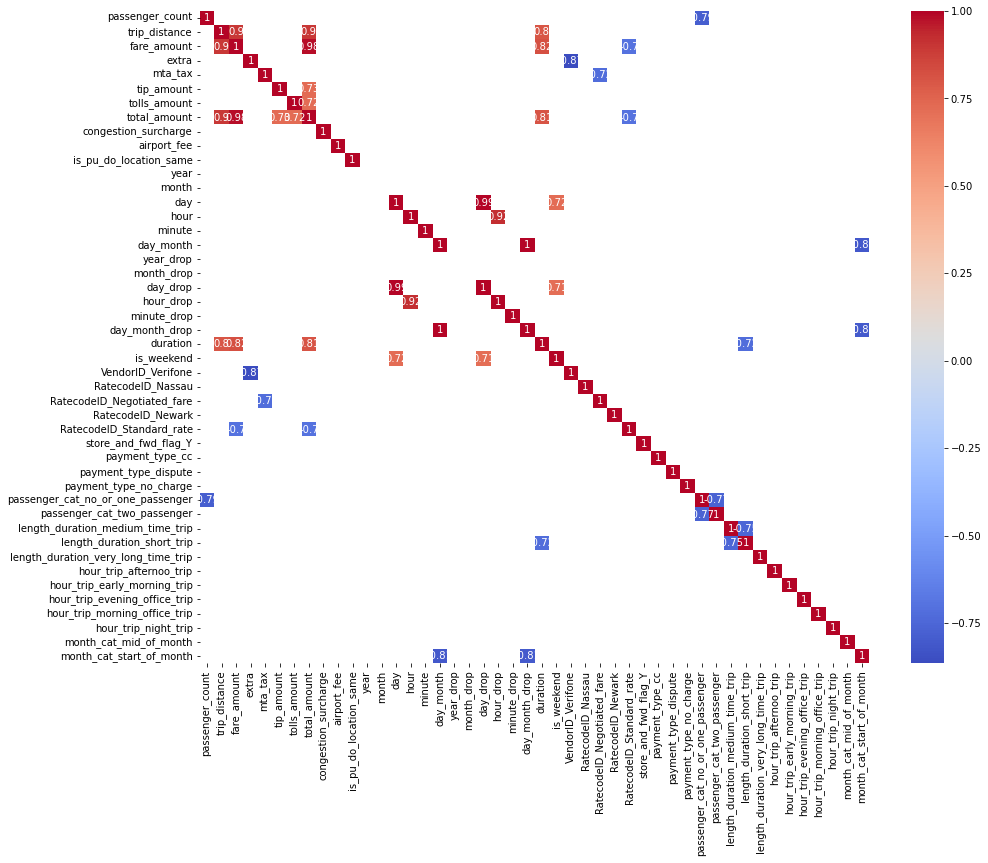

In [165]:
plt.figure(figsize=(15,12))
cr=all_df.corr()
cr=cr[abs(cr)>.7]
sns.heatmap(cr, cmap="coolwarm", annot=True)
plt.show()

In [175]:
y=all_df["total_amount"]
x=all_df.drop(columns=["total_amount", "fare_amount"])

In [176]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor


In [177]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [178]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [179]:
print("train_score", rf.score(x_train, y_train))
print("test_score", rf.score(x_test, y_test))

train_score 0.9968463994129324
test_score 0.9770224755336036


In [180]:
pd.DataFrame({"Var": x_train.columns, "imp":rf.feature_importances_}).sort_values(by="imp", ascending=False)

,Var,imp
1,trip_distance,0.73763
4,tip_amount,0.12039
21,duration,0.06285
27,RatecodeID_Standard_rate,0.05141
5,tolls_amount,0.00818
3,mta_tax,0.00260
13,minute,0.00153
19,minute_drop,0.00142
6,congestion_surcharge,0.00119
12,hour,0.00114
